In [8]:
import numpy as np
import pandas as pd
import json
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # sets up pretty plots
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
login_df = pd.read_json('logins.json')

In [3]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
type(login_df.login_time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


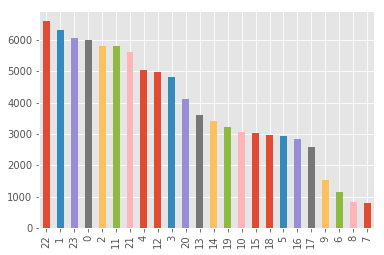

In [6]:
login_df['login_time'].dt.hour.value_counts().plot(kind='bar')

In [9]:
rng = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
ts = pd.Series(np.zeros(len(rng)), index=rng)

login_df = login_df.sort_values('login_time') # Get the login times in order.
login_df = login_df.reset_index(drop=True)
login_df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [10]:
p = 0 
for i in range(len(login_df)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = login_df['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

In [11]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

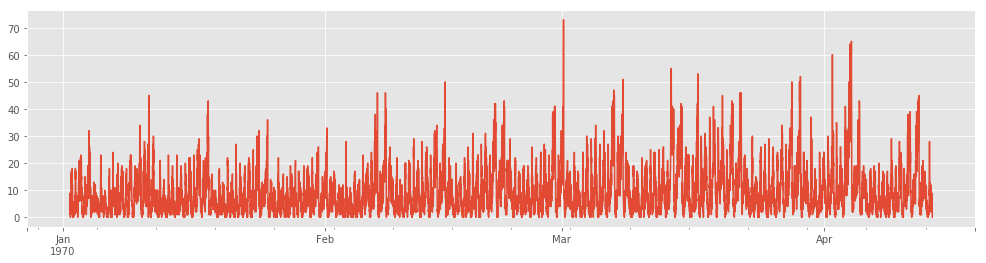

In [12]:
plt.figure(figsize=(17,4)) # The entire data set
ts.plot()

In [13]:
ts.max()

73.0

# Part 2
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
I would choose weekend engagement for drivers in the city other than their primary weekday city. With the huge difference in peak times during the weekdays, it is unlikely that any driver would take advantage of both cities as that would equate to working more than 12 hours a day. However, with weekends being active for both throughout the day, it is more reasonable to expect a driver to take customers back and forth with tolls not being an issue.

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

In [19]:
with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)

ultimate_df = pd.DataFrame(data)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [20]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
ultimate_df['last_trip_date'][0]

'2014-06-17'

In [22]:

#this sequence runs through the dataframe, creates a date six months from the start date, and then checks if the last trip falls
#within a 30 days of that time. Then it ouputs a 1 or 0 to a list of active users.

active_users = []
for i in range(len(ultimate_df)):
    st = pd.Timestamp(ultimate_df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(ultimate_df['last_trip_date'][i]) <= et:
        active_users.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active_users.append([0])

In [23]:
df1 = pd.DataFrame(active_users,columns = ['active_users'])
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [24]:
12198/50000*100

24.396

## Continuous Data

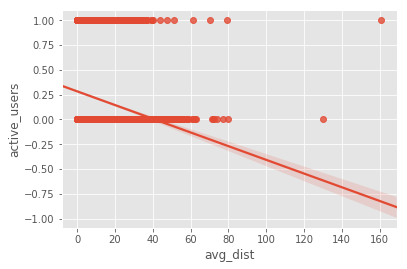

In [25]:
sns.regplot(y=df1['active_users'], x=ultimate_df['avg_dist'], fit_reg = True)

It appears that the longer the average distance, the less likely one is to be active. This makes sense in that someone who is taking a one-time, longer trip may have been longer on average. I will include this feature.

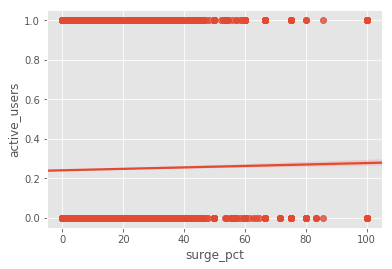

In [26]:
sns.regplot(y=df1['active_users'], x=ultimate_df['surge_pct'], fit_reg = True)

There is almost no correlation here so I will not include surge percentage - or its correlary, average surge.

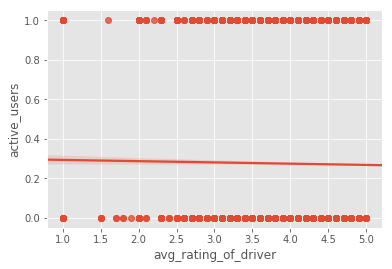

In [27]:
sns.regplot(y=df1['active_users'], x=ultimate_df['avg_rating_of_driver'], fit_reg = True)

Average rating by driver has a stronger (negative) correlation, so I will inlcude it

## Categorical Data

In [28]:
df = pd.concat([ultimate_df, df1], axis = 1)

In [29]:

df = df.drop(['avg_rating_of_driver', 'avg_surge','surge_pct','last_trip_date','signup_date','weekday_pct'], axis = 1)

In [30]:
df.head()

,avg_dist,avg_rating_by_driver,city,phone,trips_in_first_30_days,ultimate_black_user,active_users
0,3.67,5.0,King's Landing,iPhone,4,True,0
1,8.26,5.0,Astapor,Android,0,False,0
2,0.77,5.0,Astapor,iPhone,3,False,0
3,2.36,4.9,King's Landing,iPhone,9,True,1
4,3.13,4.9,Winterfell,Android,14,False,0


In [31]:
# Table of phone type vs active
phone_active = pd.crosstab(index=df["active_users"], 
                            columns=df["phone"],
                             margins=True)   # Include row and column totals

phone_active.columns = ["Android","iPhone","rowtotal"]
phone_active.index= ["Not Active","Is Active","coltotal"]

phone_active

,Android,iPhone,rowtotal
Not Active,13096,24394,37490
Is Active,1926,10188,12114
coltotal,15022,34582,49604


In [32]:

# Table of ultimate balck vs active
city_active = pd.crosstab(index=df["active_users"], 
                            columns=df["city"],
                             margins=True)   # Include row and column totals

city_active.columns = ["Astapor","King's Landing",'Winterfell',"rowtotal"]
city_active.index= ["Not Active","Is Active","coltotal"]

city_active

,Astapor,King's Landing,Winterfell,rowtotal
Not Active,13838,6099,17865,37802
Is Active,2696,4031,5471,12198
coltotal,16534,10130,23336,50000


In [34]:
#transforming categorical features into numerical to make sklearn happy
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Astapor',"King's Landing",'Winterfell'])
LE = preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])

LabelEncoder()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
active_users              50000 non-null int64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [36]:
df_drop = df.dropna()

In [38]:
df_drop['active_users'].value_counts()

0    37314
1    12092
Name: active_users, dtype: int64

In [39]:
df = df.dropna()
df = df.reset_index(drop = True)

In [40]:
creation1 = le.transform(df['city']) #transform the categorical data into number labels
creation2 = LE.transform(df['phone'])

In [41]:
df2 = pd.DataFrame(creation1,columns = ['city#']) # add them to the dataframe
df3 = pd.DataFrame(creation2, columns = ['phone#'])
df = pd.concat([df,df2,df3],axis =1 )

In [42]:
len(df)

49406

In [43]:
df = df.drop(['city','phone'], axis=1) # no need for old columns

In [44]:
#final cleaning step - change true/false labels to 1/0's. 
UB = []
for i in range(len(df)):
    if df['ultimate_black_user'][i] == True:
        UB.append([1]) 
    else:
        UB.append([0])
df4 = pd.DataFrame(UB,columns = ['UB'])
df4.head()

,UB
0,1
1,0
2,0
3,1
4,0


In [45]:
df = pd.concat([df,df4],axis =1 )
df = df.drop(['ultimate_black_user'], axis=1) # no need for old columns
df.head() #ready for model

,avg_dist,avg_rating_by_driver,trips_in_first_30_days,active_users,city#,phone#,UB
0,3.67,5.0,4,0,1,1,1
1,8.26,5.0,0,0,0,0,0
2,0.77,5.0,3,0,0,1,0
3,2.36,4.9,9,1,1,1,1
4,3.13,4.9,14,0,2,0,0


In [46]:
y = df['active_users']
X = df[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city#', 'phone#','UB']]

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14629   329]
 [ 4278   527]]
             precision    recall  f1-score   support

          0       0.77      0.98      0.86     14958
          1       0.62      0.11      0.19      4805

avg / total       0.74      0.77      0.70     19763



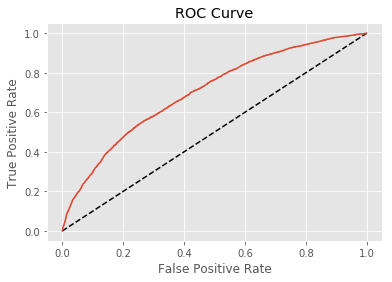

In [48]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7014870287516111
AUC scores computed using 5-fold cross-validation: [0.70163397 0.69688678 0.69419603 0.70068098 0.70837158]


In [50]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7665668137473182
